In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('length_sp_val_curves.csv')

In [81]:
df = df.drop([x for x in df.columns if 'MAX' in x],axis=1)
df = df.drop([x for x in df.columns if 'MIN' in x],axis=1)


In [82]:
#melt for seaborn - seaborn takes care of grouping and aggregation, just need a variable name to group by
df = pd.melt(df, id_vars='Step')

#expr1 if condition1 else expr2 if condition2 else expr

df['variable'] = df['variable'].apply(lambda x: 'Baseline' if 'base' in x else 'Regularized' if 'reg' in x else 'UNK' )

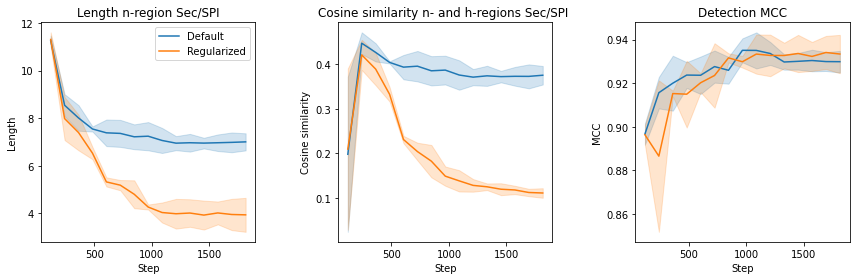

In [102]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)

df = pd.read_csv('length_sp_val_curves.csv')
df = df.drop([x for x in df.columns if 'MAX' in x],axis=1)
df = df.drop([x for x in df.columns if 'MIN' in x],axis=1)
df = pd.melt(df, id_vars='Step')
df['variable'] = df['variable'].apply(lambda x: 'Baseline' if 'base' in x else 'Regularized' if 'reg' in x else 'UNK' )

sns.lineplot(data=df, x='Step', y='value', hue='variable', ci='sd')
plt.title('Length n-region Sec/SPI')
plt.ylabel('Length')
plt.legend(['Default', 'Regularized'])


plt.subplot(1,3,2)

df = pd.read_csv('similarity_nh_sp_val_curves.csv')
df = df.drop([x for x in df.columns if 'MAX' in x],axis=1)
df = df.drop([x for x in df.columns if 'MIN' in x],axis=1)
df = pd.melt(df, id_vars='Step')
df['variable'] = df['variable'].apply(lambda x: 'Baseline' if 'base' in x else 'Regularized' if 'reg' in x else 'UNK' )

sns.lineplot(data=df, x='Step', y='value', hue='variable', ci='sd', legend=False)
plt.title('Cosine similarity n- and h-regions Sec/SPI ')
plt.ylabel('Cosine similarity')


plt.subplot(1,3,3)

df = pd.read_csv('detection_mcc_val_curves.csv')
df = df.drop([x for x in df.columns if 'MAX' in x],axis=1)
df = df.drop([x for x in df.columns if 'MIN' in x],axis=1)
df = pd.melt(df, id_vars='Step')
df['variable'] = df['variable'].apply(lambda x: 'Baseline' if 'base' in x else 'Regularized' if 'reg' in x else 'UNK' )

sns.lineplot(data=df, x='Step', y='value', hue='variable', ci='sd', legend=False)
plt.title('Detection MCC')
plt.ylabel('MCC')

plt.tight_layout()

plt.savefig('cosine_regularization_val_curves.png')

In [ ]:
base_cols = [x for x in df.columns if 'base' in x]
reg_cols = [x for x in df.columns if 'reg' in x]
sp_len_mean_base = df[base_cols].mean(axis=1)
sp_len_mean_reg = df[reg_cols].mean(axis=1)
sp_len_std_base =  df[base_cols].std(axis=1)
sp_len_std_reg =  df[reg_cols].std(axis=1)
df = pd.DataFrame([sp_len_mean_base,sp_len_mean_reg,sp_len_std_base])

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
allowed_transitions = [(0,0), (0,1), (1,1), (1,2), (1,0), (2,1), (2,2), #NO_SP: I-I, I-M, M-M, M-O, M-I, O-M, O-O
                                   (3,3), (3,4), (4,4), (4,5), (5,5), (5,8), (8,8), (8,7), (7,7), (7,6), (6,6), (6,7), (7,8), #TODO check C->M, if true would be (5,7)
                                   #9 N, 10 H, 11 CS, 12 C1, 13 I, 14 M, 15 O
                                   (9,9), (9,10), (10,10), (10,11), (11,11), (11,12), (12,15), (15,15), (15,14), (14,14), (14,13), (13,13), (13,14), (14,15),
                                   #16 N, 17 RR, 18 H, 19 C, 20 I, 21 M, 22 O
                                   (16,16), (16,17), (17,16), (16,18), (18,18), (18,19), (19,19), (19,22), (22,22), (22,21), (21,21),(21,20), (20,20), (20,21), (21,22),
                                   #23 N, 24 RR, 25 H, 26 CS, 27 C1, 28 I, 29 M, 30 O
                                   (23,23), (23,24), (24,24), (24,23), (23,25), (25,25), (25,26), (26,26), (26,27), (27,30), (30,30), (30,29), (29,29), (29,28), (28,28), (28,29),(29,30),
                                   #31 P, 32 CS, 33 H, 34 I, 35 M, 36 O
                                   #TODO check transition from 33: to M or to O
                                   (31,31), (31,32), (32,32), (32,33), (33,33), (33,36), (36,36), (36,35), (35,35), (35,34), (34,34), (34,35), (35,36)
            ] 
            
allowed_starts = [0, 1, 3, 9, 16, 23, 31]
allowed_ends = [0,1,2, 13,14,15, 20,21,22, 28,29,30, 34,35,36]

SP_REGION_VOCAB = {
                    'NO_SP_I' : 0,
                    'NO_SP_M' : 1,
                    'NO_SP_O' : 2,

                    'SP_N' :    3,
                    'SP_H' :    4,
                    'SP_C' :    5,
                    'SP_I' :    6,
                    'SP_M' :    7,
                    'SP_O' :    8,

                    'LIPO_N':   9,
                    'LIPO_H':  10,
                    'LIPO_CS': 11, #conserved 2 positions before the CS are not hydrophobic,but are also not considered a c region
                    'LIPO_C1': 12, #the C in +1 of the CS
                    'LIPO_I':  13,
                    'LIPO_M':  14,
                    'LIPO_O':  15,

                    'TAT_N' :  16,
                    'TAT_RR':  17, #conserved RR marks the border between n,h
                    'TAT_H' :  18,
                    'TAT_C' :  19,
                    'TAT_I' :  20,
                    'TAT_M' :  21,
                    'TAT_O' :  22,

                    'TATLIPO_N' : 23,
                    'TATLIPO_RR': 24,
                    'TATLIPO_H' : 25,
                    'TATLIPO_CS' : 26,
                    'TATLIPO_C1': 27, #the C in +1 of the CS
                    'TATLIPO_I' : 28,
                    'TATLIPO_M' : 29,
                    'TATLIPO_O' : 30,

                    'PILIN_P': 31,
                    'PILIN_CS':32,
                    'PILIN_H': 33,
                    'PILIN_I': 34,
                    'PILIN_M': 35,
                    'PILIN_O': 36,
                    }

In [51]:
trans_matrix = np.zeros((37,37))
for fr,to in allowed_transitions:
    trans_matrix[fr,to] = 1

Text(86.09375, 0.5, 'from')

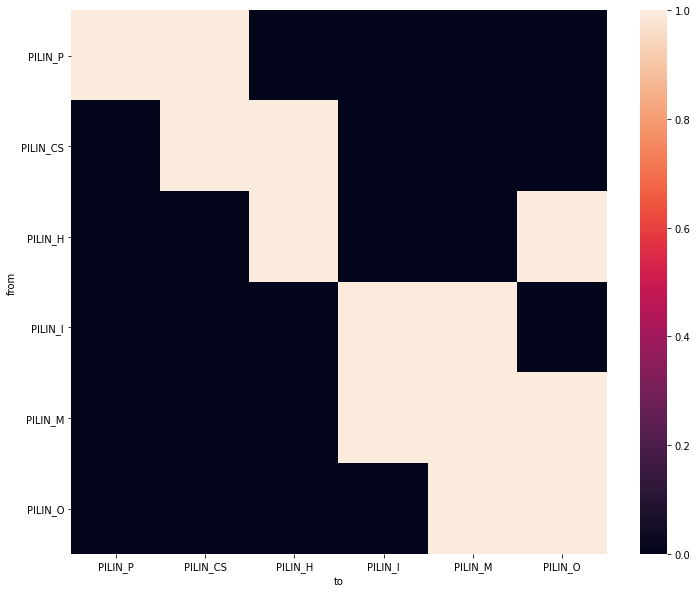

In [54]:
subidx_start = 31
subidx_end = 37

plt.figure(figsize=(12,10))
hm = sns.heatmap(trans_matrix[subidx_start:subidx_end, subidx_start:subidx_end], 
            xticklabels=list(SP_REGION_VOCAB.keys())[subidx_start:subidx_end], 
            yticklabels=list(SP_REGION_VOCAB.keys())[subidx_start:subidx_end])
hm.set_yticklabels(hm.get_yticklabels(), rotation=0) 
plt.xlabel('to')
plt.ylabel('from')

In [50]:
#format is from-to
allowed_transitions = [
    
    #NO_SP
    (0,0), (0,1), (1,1), (1,2), (1,0), (2,1), (2,2), # I-I, I-M, M-M, M-O, M-I, O-M, O-O
    #SPI
    #3 N, 4 H, 5 C, 6 I, 7M, 8 O
    (3,3), (3,4), (4,4), (4,5), (5,5), (5,8), (8,8), (8,7), (7,7), (7,6), (6,6), (6,7), (7,8), #TODO check C->M, if true would be (5,7)
    
    #SPII
    #9 N, 10 H, 11 CS, 12 C1, 13 I, 14 M, 15 O
    (9,9), (9,10), (10,10), (10,11), (11,11), (11,12), (12,15), (15,15), (15,14), (14,14), (14,13), (13,13), (13,14), (14,15),
    
    #TAT
    #16 N, 17 RR, 18 H, 19 C, 20 I, 21 M, 22 O
    (16,16), (16,17), (17,17), (17,16), (16,18), (18,18), (18,19), (19,19), (19,22), (22,22), (22,21), (21,21),(21,20), (20,20), (20,21), (21,22),
    
    #TATLIPO
    #23 N, 24 RR, 25 H, 26 CS, 27 C1, 28 I, 29 M, 30 O
    (23,23), (23,24), (24,24), (24,23), (23,25), (25,25), (25,26), (26,26), (26,27), (27,30), (30,30), (30,29), (29,29), (29,28), (28,28), (28,29),(29,30),
    
    #PILIN
    #31 P, 32 CS, 33 H, 34 I, 35 M, 36 O
    #TODO check transition from 33: to M or to O. Need to fix when making real h-region labels (so far ignoring TM info, just 10 pos h)
    (31,31), (31,32), (32,32), (32,33), (33,33), (33,36), (36,36), (36,35), (35,35), (35,34), (34,34), (34,35), (35,36)
    
]

In [58]:
#[A, R, , N, D, , C, , Q, E, G, , H, I, , L, K, M, , F, , P, , S, T, W, , Y, , V, , B, , Z, , X, *]

blosum62 = np.array([
[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2, 0, -2, -1, 0, -4, ],
[-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3, -1, 0, -1, -4, ],
[-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3, 0, -2, -3, -2, 1, 0, -4, -2, -3, 3, 0, -1, -4, ],
[-2, -2, 1, 6, -3, 0, 2, -1, -1, -3, -4, -1, -3, -3, -1, 0, -1, -4, -3, -3, 4, 1, -1, -4, ],
[ 0, -3, -3, -3, 9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1, -3, -3, -2, -4, ],
[-1, 1, 0, 0, -3, 5, 2, -2, 0, -3, -2, 1, 0, -3, -1, 0, -1, -2, -1, -2, 0, 3, -1, -4, ],
[-1, 0, 0, 2, -4, 2, 5, -2, 0, -3, -3, 1, -2, -3, -1, 0, -1, -3, -2, -2, 1, 4, -1, -4, ],
[ 0, -2, 0, -1, -3, -2, -2, 6, -2, -4, -4, -2, -3, -3, -2, 0, -2, -2, -3, -3, -1, -2, -1, -4, ],
[-2, 0, 1, -1, -3, 0, 0, -2, 8, -3, -3, -1, -2, -1, -2, -1, -2, -2, 2, -3, 0, 0, -1, -4, ],
[-1, -3, -3, -3, -1, -3, -3, -4, -3, 4, 2, -3, 1, 0, -3, -2, -1, -3, -1, 3, -3, -3, -1, -4, ],
[-1, -2, -3, -4, -1, -2, -3, -4, -3, 2, 4, -2, 2, 0, -3, -2, -1, -2, -1, 1, -4, -3, -1, -4, ],
[-1, 2, 0, -1, -3, 1, 1, -2, -1, -3, -2, 5, -1, -3, -1, 0, -1, -3, -2, -2, 0, 1, -1, -4, ],
[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1, 5, 0, -2, -1, -1, -1, -1, 1, -3, -1, -1, -4, ],
[-2, -3, -3, -3, -2, -3, -3, -3, -1, 0, 0, -3, 0, 6, -4, -2, -2, 1, 3, -1, -3, -3, -1, -4, ],
[-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4, 7, -1, -1, -4, -3, -2, -2, -1, -2, -4, ],
[ 1, -1, 1, 0, -1, 0, 0, 0, -1, -2, -2, 0, -1, -2, -1, 4, 1, -3, -2, -2, 0, 0, 0, -4, ],
[ 0, -1, 0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1, 1, 5, -2, -2, 0, -1, -1, 0, -4, ],
[-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1, 1, -4, -3, -2, 11, 2, -3, -4, -3, -2, -4, ],
[-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -2, -1, 3, -3, -2, -2, 2, 7, -1, -3, -2, -1, -4, ],
[ 0, -3, -3, -3, -1, -2, -2, -3, -3, 3, 1, -2, 1, -1, -2, -2, 0, -3, -1, 4, -3, -2, -1, -4, ],
[-2, -1, 3, 4, -3, 0, 1, -1, 0, -3, -4, 0, -3, -3, -2, 0, -1, -4, -3, -3, 4, 1, -1, -4, ],
[-1, 0, 0, 1, -3, 3, 4, -2, 0, -3, -3, 1, -1, -3, -1, 0, -1, -3, -2, -2, 1, 4, -1, -4, ],
[ 0, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, 0, 0, -2, -1, -1, -1, -1, -1, -4, ],
[-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, 1, ]])

In [68]:
blosum = np.array([[ 4, -1, -2, -2,  0, -1, -1,  0, -2, -1, -1, -1, -1, -2, -1,  1,  0, -3, -2,  0],
                   [-1,  5,  0, -2, -3,  1,  0, -2,  0, -3, -2,  2, -1, -3, -2, -1, -1, -3, -2, -3],
                   [-2,  0,  6,  1, -3,  0,  0,  0,  1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3],
                   [-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3],
                   [ 0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
                   [-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1,  0, -3, -1,  0, -1, -2, -1, -2],
                   [-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2],
                   [ 0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3],
                   [-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
                   [-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3],
                   [-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1],
                   [-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2],
                   [-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1,  5,  0, -2, -1, -1, -1, -1,  1],
                   [-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1],
                   [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2],
                   [ 1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2],
                   [ 0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1,  1,  5, -2, -2,  0],
                   [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3],
                   [-2, -2, -2, -3, -2, -1, -2, -3,  2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1],
                   [ 0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2,  1, -1, -2, -2,  0, -3, -1,  4]])

In [83]:
row_norms = np.linalg.norm(blosum,ord=2,axis=1, keepdims=True)
normalized_blosum = blosum/row_norms

In [99]:
minima =np.min(blosum, axis=1, keepdims=True)
maxima =np.max(blosum, axis=1, keepdims=True)

(blosum-minima)/(maxima-minima)

array([[1.        , 0.28571429, 0.14285714, 0.14285714, 0.42857143,
        0.28571429, 0.28571429, 0.42857143, 0.14285714, 0.28571429,
        0.28571429, 0.28571429, 0.28571429, 0.14285714, 0.28571429,
        0.57142857, 0.42857143, 0.        , 0.14285714, 0.42857143],
       [0.25      , 1.        , 0.375     , 0.125     , 0.        ,
        0.5       , 0.375     , 0.125     , 0.375     , 0.        ,
        0.125     , 0.625     , 0.25      , 0.        , 0.125     ,
        0.25      , 0.25      , 0.        , 0.125     , 0.        ],
       [0.2       , 0.4       , 1.        , 0.5       , 0.1       ,
        0.4       , 0.4       , 0.4       , 0.5       , 0.1       ,
        0.1       , 0.4       , 0.2       , 0.1       , 0.2       ,
        0.5       , 0.4       , 0.        , 0.2       , 0.1       ],
       [0.2       , 0.2       , 0.5       , 1.        , 0.1       ,
        0.4       , 0.6       , 0.3       , 0.3       , 0.1       ,
        0.        , 0.3       , 0.1       , 0